In [81]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
# Get data
array_files_csv = glob.glob("Circles/*.csv")

In [83]:
array_files_csv

['Circles/smal_circle.csv', 'Circles/big_circle.csv']

In [84]:
def concatenateDatasets(array_to_concatenate):
    dataset = 0
    array = []
    for velocidadeVia in array_to_concatenate:
        dataset = pd.read_csv(velocidadeVia,sep='\t')
        array.append(dataset)
    return pd.concat(array)

In [85]:
#Create an array with all data arrays
dataFiles = concatenateDatasets(array_files_csv)

In [86]:
np.warnings.filterwarnings('error', category=np.VisibleDeprecationWarning)

In [87]:
dataFiles = dataFiles.drop('Unnamed: 0', axis=1)

In [88]:
dim = input("Digite o valor da dimensão ")

Digite o valor da dimensão 2


In [89]:
dim = int(dim)

In [90]:
k_value = input("Insira o tamanho do Dicionario (K): ")

Insira o tamanho do Dicionario (K): 32


In [91]:
k_value = int(k_value)

In [92]:
limiar_dist = input("Insira o Limiar de distorção: ")

Insira o Limiar de distorção: 0.00000001


In [93]:
limiar_dist = float(limiar_dist)

In [94]:
## K means initialization
import random
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

r = 1

#centroidsIniciais=[]
centroidsFinal=[]
numero_iteracoes=[]
mse=[]
starter_cent = []

while r <= 30:

#     np.random.seed(200)
    k = k_value

# Gera centroids a partir dos pontos do conj de treino    
    centroids = {
        i+1: [random.choice(dataFiles['x'].to_numpy()),random.choice(dataFiles['y'].to_numpy())]
        for i in range(k)
        }
    starter_cent.append(centroids) #centroides iniciais p usar no accelerate kmeans

    import pandas as pd

    df = pd.DataFrame(columns=[])
    df = dataFiles
    df = df.rename(columns={'x':'0','y':'1'}) 

    def assignment(df, centroids):
        for i in centroids.keys():
            value = 0
            # (x1 - x2)² + (y1 - y2)²
            for a in range(dim):
                value = (df[f"{a}"] - centroids[i][a]) ** 2 + value
            df['distance_from_{}'.format(i)] = value
        centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
        df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
        df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
#         df['color'] = df['closest'].map(lambda x: colors[x])
        return df

    df = assignment(df, centroids)
    
    import copy

    # old_centroids = copy.deepcopy(centroids)

    def update(k):
        for i in centroids.keys():
            for a in range(dim):
                centroids[i][a] = np.mean(df[df['closest'] == i][f"{a}"])
        return k

    centroids = update(centroids)

    df = assignment(df, centroids)

    a = 0
    while True:
        a = a + 1
        closest_centroids = df['closest'].copy(deep=True)
        for i in closest_centroids:
            df['old_value'] = df['distance_from_{}'.format(i)]
        centroids = update(centroids)
        df = assignment(df, centroids)
        current_centroids = df['closest'].copy(deep=True)
        for i in current_centroids:
            df['current_value'] = df['distance_from_{}'.format(i)]
        delta = (np.sum(df['old_value']) - np.sum(df['current_value']))/(np.sum(df['old_value']))
        if delta <= limiar_dist: 
            break
    num_int = a        

    old_df = df
    old_df = old_df.drop(['0','1','closest','old_value','current_value'], axis=1)
    for i in centroids.keys():
        old_df = old_df.rename(columns={f"distance_from_{i}":f"{i}"})    
    new_df = pd.DataFrame(columns=['new_data_with_centroids'])
    def reconstrucao():
        arr = []
        valueCentroidMin = old_df.idxmin(axis=1)
        valueCentroidMin = np.array(valueCentroidMin)
        for i in valueCentroidMin:
            arr.append(centroids[int(i)])
        new_df['new_data_with_centroids'] = arr

    reconstrucao()

    new_df['old_data_x'] = dataFiles['x'].to_numpy()
    new_df['old_data_y'] = dataFiles['y'].to_numpy()

    array_x = []
    array_y = []
    for i in new_df['new_data_with_centroids']:
        array_x.append(i[0])
        array_y.append(i[1])
    new_df['x_new'] = array_x
    new_df['y_new'] = array_y
    new_df = new_df.drop(['new_data_with_centroids'], axis=1)

    # new_df

    a = 0
    MSE = 0
    new_value = [*new_df['x_new'].to_numpy() , *new_df['y_new'].to_numpy()] 
    old_value = [*new_df['old_data_x'].to_numpy() , *new_df['old_data_y'].to_numpy()]
    for i in new_value:
        MSE = (i - old_value[a]) **2 + MSE  
        a = a + 1
    MSE = MSE / len(new_value) 
    dataFrameFinal = pd.DataFrame(columns=[])

    centroidsFinal.append(json.dumps(centroids))
    numero_iteracoes.append(num_int)
    mse.append(MSE)

    r = r + 1

dataFrameFinal['MSE'] = mse
dataFrameFinal['centroidsInicial'] = starter_cent
dataFrameFinal['centroidsFinal'] = centroidsFinal
dataFrameFinal['NInteracoes'] = numero_iteracoes

dataFrameFinal.to_csv('Circles/tables/tabela_final_Kmeans_32centroid.csv')

import pickle

with open("Circles/inicialCentroids_32centroids.txt", "wb") as fp:   #Pickling
    pickle.dump(starter_cent, fp)

In [95]:
value_test = json.loads(dataFrameFinal['centroidsFinal'][29])

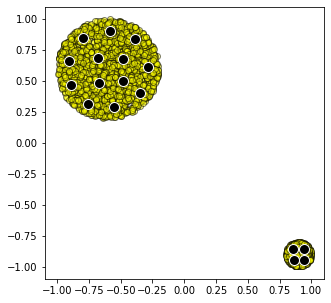

In [96]:
fig = plt.figure(figsize=(5,5))
img = plt.scatter(df['0'], df['1'],color='yellow',alpha=0.5,edgecolor='k')
for i in value_test.keys():
    plt.scatter(*value_test[i],color='black',s=100,edgecolor='white')
plt.show()

In [80]:
dataFrameFinal

,MSE,centroidsInicial,centroidsFinal,NInteracoes
0,0.001463,"{1: [nan, nan], 2: [nan, nan], 3: [-0.90978520...","{""1"": [NaN, NaN], ""2"": [NaN, NaN], ""3"": [-0.90...",1
1,0.001512,"{1: [-0.5976892607313742, 0.5143658272382917],...","{""1"": [-0.5976892607313742, 0.5143658272382917...",1
2,0.001144,"{1: [nan, nan], 2: [nan, nan], 3: [nan, nan], ...","{""1"": [NaN, NaN], ""2"": [NaN, NaN], ""3"": [NaN, ...",1
3,0.001396,"{1: [nan, nan], 2: [nan, nan], 3: [-0.84546048...","{""1"": [NaN, NaN], ""2"": [NaN, NaN], ""3"": [-0.84...",1
4,0.001157,"{1: [nan, nan], 2: [-0.9154402238652682, 0.555...","{""1"": [NaN, NaN], ""2"": [-0.9154402238652682, 0...",1
5,0.001457,"{1: [-0.450314419406977, 0.49985081609131127],...","{""1"": [-0.450314419406977, 0.49985081609131127...",1
6,0.001592,"{1: [-0.4057430096997157, 0.27193037548095905]...","{""1"": [-0.4057430096997157, 0.2719303754809590...",1
7,0.001760,"{1: [-0.6510748282733334, 0.9485948850872568],...","{""1"": [-0.6510748282733334, 0.9485948850872568...",2
8,0.001374,"{1: [nan, nan], 2: [nan, nan], 3: [-0.40210890...","{""1"": [NaN, NaN], ""2"": [NaN, NaN], ""3"": [-0.40...",1
9,0.001237,"{1: [-0.8461464817744492, 0.8496536747652467],...","{""1"": [-0.8461464817744492, 0.8496536747652467...",1
